<a href="https://colab.research.google.com/github/PalakAggarwal13/MachineLearning/blob/main/Rock_Vs_Mine_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
df = pd.read_csv('/content/gdrive/My Drive/Datasets/sonar_data.csv' , header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [7]:
df.shape

(208, 61)

In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [9]:
df[60].value_counts()

,count
60,
M,111
R,97


In [14]:
X = df.drop(columns=60,axis=1)
Y = df[60]
print(X)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

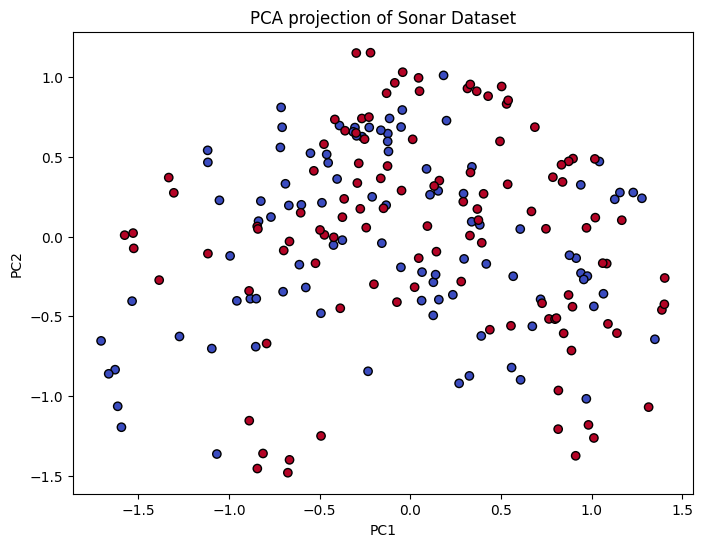

In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=(Y == 'M'), cmap='coolwarm', edgecolor='k')
plt.title("PCA projection of Sonar Dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# **APPLYING LOGISTIC REGRESSION**

In [15]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.1, stratify = Y, random_state=1)

In [16]:
print(X.shape , X_train.shape , X_test.shape)

(208, 60) (187, 60) (21, 60)


In [17]:
model = LogisticRegression()
model = model.fit(X_train,Y_train)

In [30]:
y_pred_train = model.predict(X_train)
print(classification_report(Y_train,y_pred_train))

              precision    recall  f1-score   support

           M       0.83      0.86      0.85       100
           R       0.83      0.80      0.82        87

    accuracy                           0.83       187
   macro avg       0.83      0.83      0.83       187
weighted avg       0.83      0.83      0.83       187



In [33]:
accuracy_score(y_pred_train,Y_train)

0.8342245989304813

In [31]:
y_pred_test = model.predict(X_test)
print(classification_report(Y_test,y_pred_test))

              precision    recall  f1-score   support

           M       0.75      0.82      0.78        11
           R       0.78      0.70      0.74        10

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.76      0.76      0.76        21



In [32]:
accuracy_score(y_pred_test,Y_test)

0.7619047619047619

# **Making a Predictive System**

In [36]:
input_data = (0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032)
input_data_as_nparray = np.asarray(input_data)

x = input_data_as_nparray.reshape(1,-1)
prediction = model.predict(x)

if prediction[0] == 'R':
  print("Rock")
else:
  print("Mine")

Rock


# **USING SVM**

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    print(f"\n🔍 SVM with {kernel} kernel:")

    if kernel == 'poly':
        svm_model = SVC(kernel=kernel, C=10, degree=3)
    else:
        svm_model = SVC(kernel=kernel, C=10)

    svm_model.fit(X_train_scaled, Y_train)
    y_pred = svm_model.predict(X_test_scaled)

    start = time.time()
    svm_model.fit(X_train_scaled, Y_train)
    y_pred = svm_model.predict(X_test_scaled)
    end = time.time()

    print(f"⏱️ Time taken: {end - start:.3f} seconds")

    print("Accuracy:", accuracy_score(Y_test, y_pred))
    print(classification_report(Y_test, y_pred))



🔍 SVM with linear kernel:
⏱️ Time taken: 0.013 seconds
Accuracy: 0.7619047619047619
              precision    recall  f1-score   support

           M       0.75      0.82      0.78        11
           R       0.78      0.70      0.74        10

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.76      0.76      0.76        21


🔍 SVM with rbf kernel:
⏱️ Time taken: 0.005 seconds
Accuracy: 0.9523809523809523
              precision    recall  f1-score   support

           M       0.92      1.00      0.96        11
           R       1.00      0.90      0.95        10

    accuracy                           0.95        21
   macro avg       0.96      0.95      0.95        21
weighted avg       0.96      0.95      0.95        21


🔍 SVM with poly kernel:
⏱️ Time taken: 0.004 seconds
Accuracy: 0.9047619047619048
              precision    recall  f1-score   support

           M       0.85      1.00      0.